## Загрузка данных

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Загрузка датасета
iris = load_iris()

# Преобразование в датафрейм pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Добавление столбца с целевой переменной
df['target'] = iris.target

## Поверхностный анализ датасета

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

4 float признака, целевой - категориальный. 3 сбалансированных класса

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Пропусков нет

## Корреляционный анализ

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


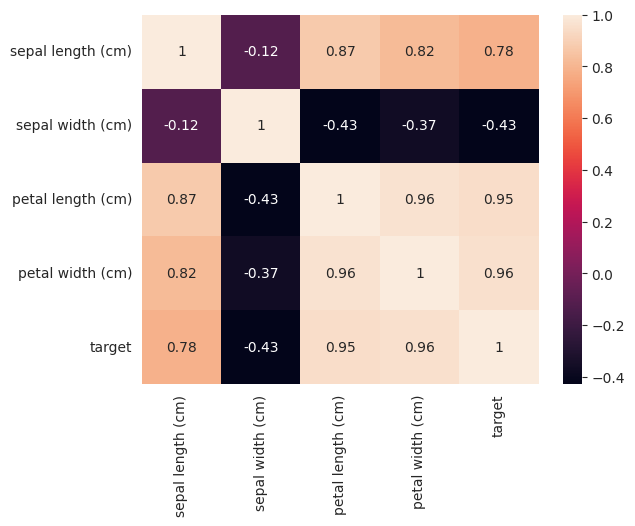

In [6]:
# Расчет корреляционной матрицы
corr = df.corr()

# Вывод корреляционной матрицы
print(corr)

# Построение тепловой карты
sn.heatmap(corr, annot=True)
plt.show()

По данной матрице нельзя судить о корреляции с таргетом, но насчет взаимосвязи между признаками можно сказать, что `sepal length`,
`petal length` и `petal width` имеют ярко выраженную положительную корреляцию между собой. Тогда как у `sepal length` не столь сильная, но отрицательная с
ними взаимосвязь.

## OneHot-кодирование целевого признака

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target_0                   -0.717416          0.603348          -0.922765   
target_1                    0.079396         -0.467703           0.201754   
target_2                    0.638020         -0.135645           0.721011   

                   petal width (cm)  target_0  target_1  target_2  
sepal length (cm)          0.817941 -0.717416  0.079396  0.638020  
sepal width (cm)          -0.366126  0.603348 -0.467703 -0.135645  
petal length (cm)          0.962865 -0.922765  0.201754  0.721011  
petal width (cm)           1.000000 -0.887344  0.117899  0.769445  
target_0                  -0.887344  1.0000

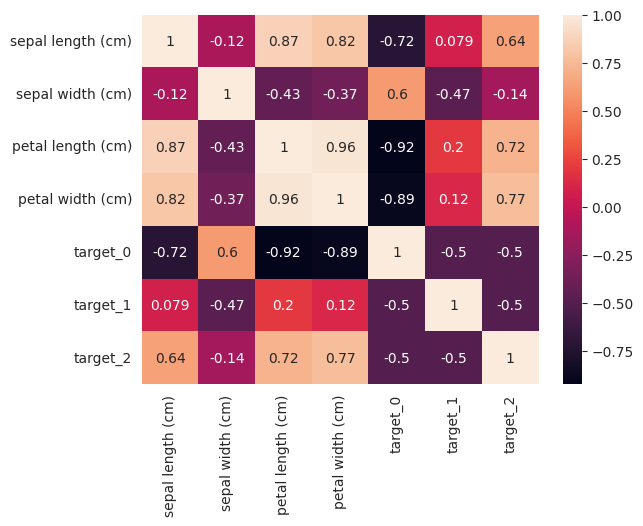

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Преобразование целевой переменной в бинарные переменные
target_encoded = encoder.fit_transform(df[['target']])

# Добавление бинарных переменных в датафрейм
df['target_0'] = target_encoded[:, 0]
df['target_1'] = target_encoded[:, 1]
df['target_2'] = target_encoded[:, 2]

# Расчет корреляционной матрицы
corr = df.drop(columns=["target"]).corr()

# Вывод корреляционной матрицы
print(corr)

# Построение тепловой карты
sn.heatmap(corr, annot=True)
plt.show()

#### Из новой тепловой карты можно извлечь уже больше полезной информации:

- `target_0` и `petal length` имеют коэффициент корреляции -0.922765, что означает, что они очень сильно коррелируют друг с другом.
- Также сильна корреляция между `target_0` и другими признаками, хоть и в меньшей степени
- `target_1` и `sepal length` имеют коэффициент корреляции 0.079396, что означает, что они почти не коррелируют друг с другом.
- Однако `sepal length` хоть и имеет слабейшую корреляцию со всеми другими признаками, всё же очень важен для определения таргета.
Дело в том, что `target_1` плохо коррелирует вообще со всеми признаками, и у `sepal length` с ним наибольшая корреляция и хоть в какой-то мере сильная
- Коэффициенты корреляции между бинарными переменными равны -0.5 или 1 в зависимости от того, являются ли они одинаковыми или разными.
Например, `target_0` и `target_1` имеют коэффициент корреляции -0.5, потому что они всегда противоположны друг другу.

#### Касательно знаков корреляции:
- Видно, что где у `target_0` отрицательная сильная корреляция, у `target_2` она сильно положительная.
- То же и касательно `target_0` и `target_1`

#### Все эти наблюдения позволяют сделать следующие выводы:
- Датасет load_iris подходит для построения моделей машинного обучения, так как имеет достаточно наблюдений (150) и признаков
(4 непрерывных и 1 категориальный).
- Целевая переменная target хорошо разделяется по значениям непрерывных признаков, таких как petal length (cm) и petal width (cm), что означает,
что эти признаки будут иметь большой вклад в модель и помогут достичь высокой точности классификации.
- Категориальная переменная target может быть закодирована с помощью OneHotEncoding для использования в модели машинного обучения

## "Скрипичный график"

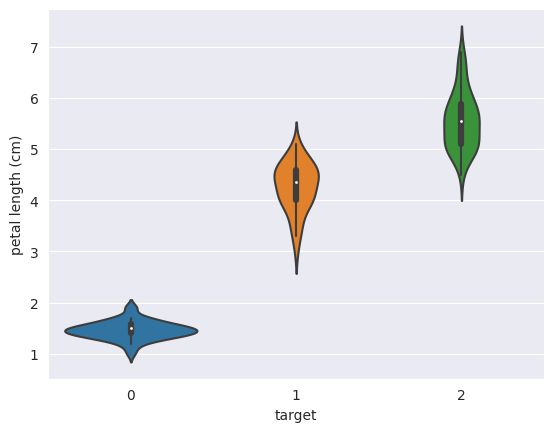

In [8]:
sn.violinplot(x='target', y='petal length (cm)', data=df)
plt.show()

## Тестирование классификатора

- Решающее дерево и случайный лес - это типы моделей машинного обучения, которые основаны на разбиении данных по определенным критериям и создании иерархической структуры ветвлений и листьев. Они хорошо подходят для задач классификации и регрессии, таких как определение вида ириса по его характеристикам.
- Решающее дерево и случайный лес могут работать с категориальными и непрерывными переменными, поэтому не требуют предварительного кодирования или масштабирования данных. Однако, они могут быть чувствительны к выбросам и шуму в данных, поэтому может потребоваться очистка данных перед обучением модели.
- Решающее дерево и случайный лес могут автоматически выбирать наиболее важные признаки для модели на основе меры информативности, такой как прирост
информации или индекс Джини. Они также могут учитывать взаимодействие между признаками при разбиении данных. Поэтому, они могут хорошо справляться с
высокой корреляцией между признаками и избегать проблемы мультиколлинеарности

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка датасета
iris = load_iris()

# Разделение данных на признаки и целевую переменную
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта модели случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на обучающей выборке
rf.fit(X_train, y_train)

# Предсказание модели на тестовой выборке
y_pred = rf.predict(X_test)

# Оценка точности модели
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


In [10]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Создание объекта модели случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на обучающей выборке
rf.fit(X_train, y_train)

# Предсказание модели на тестовой выборке
y_pred = rf.predict(X_test)

# Оценка точности модели
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9866666666666667
